# ROB 538 - Assignment #2

## Visual Plot of 5x10 Grid

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import copy

class Environment:
    def __init__(self, num_agents=2, num_targets=1, loc=(1, 10)):
        self.grid = np.zeros((7, 12))
        self.start = loc
        self.agents = dict()
        self.targets = list()
        self.agent_paths = {str(i): [self.start] for i in range(num_agents)}  # Track paths for each agent
        self.agent_colors = ['blue', 'green'] 
        self.add_category()
        self.add_targets(num_targets)
        self.add_agent(num_agents, self.start)

    def add_category(self):
        for i in range(np.shape(self.grid)[0]):
            for j in range(np.shape(self.grid)[1]):
                if (i == 0 or j == 0) or (i == 6 or j == 11):
                    self.grid[i][j] = 1
                else:
                    self.grid[i][j] = 0

    def add_targets(self, num):
        if num == 1:
            self.targets.append((4, 2))
            self.grid[4][2] = -1
        if num == 2:
            self.targets.append((4, 2))
            self.targets.append((1, 9))
            self.grid[4][2] = -1
            self.grid[1][9] = -1

    def add_agent(self, num, loc):
        for i in range(num):
            self.agents[str(i)] = loc

    def set_start(self, loc):
        self.start = loc

    def display(self):
        cmap = ListedColormap(['red', 'white', 'black'])
        img = plt.imshow(self.grid, cmap=cmap, interpolation='nearest', vmin=-1, vmax=1)
        cbar = plt.colorbar(img, ticks=[-1, 0, 1])
        cbar.set_label('Components')
        cbar.ax.set_yticklabels(['Target', 'Floor', 'Wall'])
        plt.title('Environment with Agent Paths')
        plt.gca().invert_yaxis()
        plt.xlabel('Columns')
        plt.ylabel('Rows')
        ax = plt.gca()

        # Plot agent paths with lines connecting each step, using different colors for each agent
        for agent_id, path in self.agent_paths.items():
            color = self.agent_colors[int(agent_id) % len(self.agent_colors)]  # Cycle through colors if more than available
            # Unzip the path into x (columns) and y (rows)
            y_positions, x_positions = zip(*path)
            # Plot the path with lines
            ax.plot(x_positions, y_positions, color=color, linestyle='--', linewidth=2, marker='o', markersize=5, alpha=0.5)
        
        # Mark the final position of each agent
        for agent_id, pos in self.agents.items():
            color = self.agent_colors[int(agent_id) % len(self.agent_colors)]
            ax.scatter(pos[1], pos[0], color=color, s=100, label=f'Agent {agent_id}')

        ax.set_xticks(np.arange(-0.5, self.grid.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, self.grid.shape[0], 1), minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
        ax.tick_params(which='minor', size=0)

        # Only show the legend once to avoid duplicate labels
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), loc='best')

        plt.show()

    def reset(self, id):
        self.agents[str(id)] = self.start
        num = len(self.targets)
        self.targets.clear()
        self.add_targets(num)
        self.agent_paths[str(id)] = [self.start]  # Reset the path to the starting position
        
    def step(self, action, id):
        id = str(id)
        current_pos = self.agents[id]
        new_pos = list(current_pos)
        
        # Update position based on action
        if action == 1 and new_pos[0] < 5:  # Move down
            new_pos[0] += 1
        elif action == 0 and new_pos[0] > 1:  # Move up
            new_pos[0] -= 1
        elif action == 2 and new_pos[1] > 1:  # Move left
            new_pos[1] -= 1
        elif action == 3 and new_pos[1] < 10:  # Move right
            new_pos[1] += 1

        # Update the agent's position and path
        self.agents[id] = tuple(new_pos)
        self.agent_paths[id].append(tuple(new_pos))

        # Check if the agent reached a target
        if tuple(new_pos) in self.targets:
            self.targets.remove(tuple(new_pos))
            return True, 20  # Reached a target
        else:
            return False, -1  # Not a target
        
    

In [29]:
class Policy:
    def __init__(self, environment, id=0):
        self.env = environment
        self.agent_id = str(id)
        self.direction = 2
        self.current_row = 1
        
        self.policy = np.full((5, 10), -1)
        
        self.val = np.full((5, 10), 0)
        self.policy = self.create_policy()
        print(self.policy)

    def create_policy(self):
        policy = [
            [1, 3, 3, 3, 3, 3, 3, 3, 3, 1],
            [3, 1, 0, 1, 2, 2, 2, 2, 2, 2],
            [1, 2, 2, 2, 3, 3, 3, 3, 3, 1],
            [3, 3, 3, 3, 0, 1, 2, 2, 2, 2],
            [0, 2, 2, 2, 2, 2, 2, 2, 2, 2]
        ]

        return copy.deepcopy(policy)
        
    def get_next_state(self, state, action):
        x, y = state
        if action == 0:
            x -= 1
        elif action == 1:
            x += 1
        elif action == 2:
            y -= 1
        elif action == 3:
            y += 1
        return x, y

[[1, 3, 3, 3, 3, 3, 3, 3, 3, 1], [3, 1, 0, 1, 2, 2, 2, 2, 2, 2], [1, 2, 2, 2, 3, 3, 3, 3, 3, 1], [3, 3, 3, 3, 0, 1, 2, 2, 2, 2], [0, 2, 2, 2, 2, 2, 2, 2, 2, 2]]


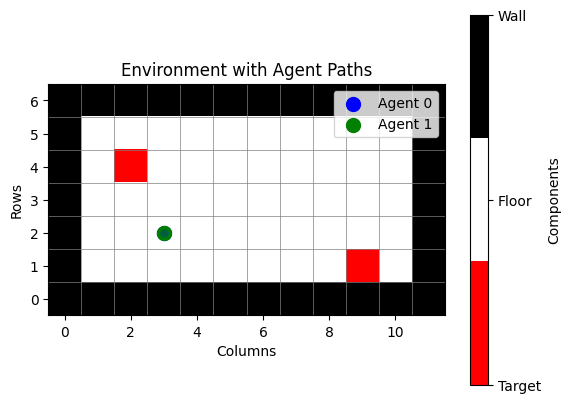

[[1, 3, 3, 3, 3, 3, 3, 3, 3, 1], [3, 1, 0, 1, 2, 2, 2, 2, 2, 2], [1, 2, 2, 2, 3, 3, 3, 3, 3, 1], [3, 3, 3, 3, 0, 1, 2, 2, 2, 2], [0, 2, 2, 2, 2, 2, 2, 2, 2, 2]]


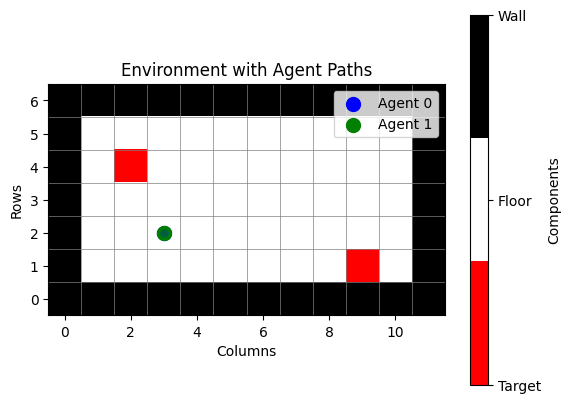

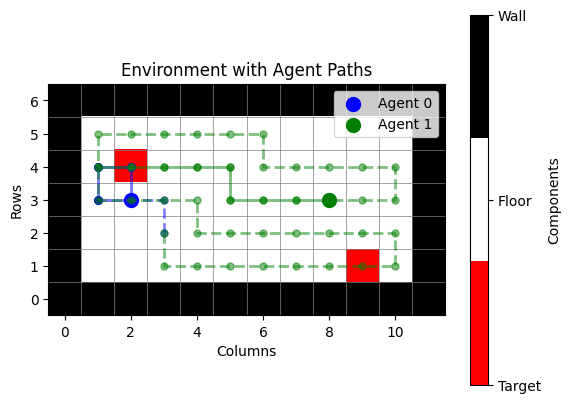

In [30]:
class Evaluation:
    def __init__(self, environment, agent, agent1):
        self.env = environment
        self.start = environment.start
        self.global_reward = [0]  # Initialize global reward
        
        self.policy = agent.policy
        if agent1 is not None:
            self.policy1 = agent1.policy
        else:
            self.policy1 = agent1
        self.V = np.zeros((5, 10))  # Value function for agent 0
        self.V1 = np.zeros((5, 10))  # Value function for agent 1
        self.agent = agent

        self.alpha = 2
        self.epsilon = 0.8
        
    def evaluate(self, max_steps):
        i0, j0 = self.env.agents['0']
        
        steps = 0
        state_history = set()  # Track visited states for agent 0
        state_history1 = set()  # Track visited states for agent 1

        dones = 0
        while dones < 3 and steps < max_steps:
            # Take a step in the environment and receive the reward and done status
            done, reward = self.env.step(self.policy[i0 - 1][j0 - 1], 0)
             # Get the new state after taking the action
            i0_new, j0_new = self.env.agents['0']
             # Penalize revisiting the same state
            if (i0_new, j0_new) in state_history:
                reward += -3  # Penalty for revisiting
            # Add the current state to the history
            state_history.add((i0_new, j0_new))
            # Update value functions with shared global reward
            self.V[i0_new-1][j0_new-1] += self.alpha * (0*reward + (1*self.global_reward[0]) - self.V[i0_new - 1][j0_new - 1])
            steps += 1

            # Check if a target was reached and increment the global reward
            if done:
                dones += 1
                self.global_reward[0] += reward  # Increment the global reward
                self.policy[i0_new - 1][j0_new - 1] = random.choice([0, 1, 2, 3])
                if self.env.agents['0'] in self.env.targets:
                    self.env.targets.remove(self.env.agents['0'])

            if self.policy1 is not None:
                i1, j1 = self.env.agents['1']
                done1, reward1 = self.env.step(self.policy1[i1 - 1][j1 - 1], 1)
                i1_new, j1_new = self.env.agents['1']
                if (i1_new, j1_new) in state_history1:
                    reward1 += -3  # Penalty for revisiting
                state_history1.add((i1_new, j1_new))
                self.V1[i1_new-1][j1_new-1] += self.alpha * (0*reward1 + (1*self.global_reward[0]) - self.V1[i1_new - 1][j1_new - 1])

                if done1:
                    dones += 1
                    self.global_reward[0] += reward1
                    self.policy1[i1_new - 1][j1_new - 1] = random.choice([0, 1, 2, 3])
                    if self.env.agents['1'] in self.env.targets:
                        self.env.targets.remove(self.env.agents['1'])
           
                i1, j1 = i1_new, j1_new
            
            # Move to the next state
            i0, j0 = i0_new, j0_new
            

        # Reset the environment after the episode
        num_targets = len(self.env.targets)
        self.env.targets.clear()
        self.env.add_targets(num_targets)
        self.env.reset(0)
            
        if self.policy1 is not None:
            self.env.reset(1)
            return copy.deepcopy(self.V), copy.deepcopy(self.V1)
        return copy.deepcopy(self.V), None
    
    def iterate(self, max_steps, iterations):
        iteration = 0
        V0_0, V0_1 = self.evaluate(max_steps)
        
        while iteration < iterations:
            i, j = self.env.agents['0']
            # Store exploitative policies
            a0 = self.policy[i - 1][j - 1]

            a = random.choice([0, 1])
            # Update policies for exploration
            self.policy[i - 1][j - 1] = a

            # Evaluate the updated policies
            V1_0, V1_1 = self.evaluate(max_steps)

            th1 = (V1_0 - V0_0) > 0.7
            
            if th1.any() or random.random() < self.epsilon:
                V0_0 = copy.deepcopy(V1_0)  # Explore options
            else:
                self.policy[i - 1][j - 1] = a0  # Exploit Policy
            

            iteration += 1
            i, j = self.agent.get_next_state((i, j), self.policy[i - 1][j - 1])


            if self.policy1 is not None:
                i1, j1 = self.env.agents['1']
                b0 = self.policy1[i1 - 1][j1 - 1]
                b = random.choice([0, 1, 2, 3])
                self.policy1[i1 - 1][j1 - 1] = b
                th2 = (V1_1 - V0_1) > 0.7
                if th2.any() or random.random() < self.epsilon:
                    V0_1 = copy.deepcopy(V1_1)
                else:
                    self.policy1[i1 - 1][j1 - 1] = b0  

                i1, j1 = self.agent.get_next_state((i, j1), self.policy1[i1 - 1][j1 - 1])

        # Reset the environment after iterations
        self.env.reset(0)
        if self.policy1 is not None:
            self.env.reset(1)

# Example usage
env = Environment(2, 2, (2, 3))
agent = Policy(env, 0)
env.display()
agent1 = Policy(env, 1)

# Reset the environment to starting positions
env.reset(0)
env.reset(1)
policy_eval = Evaluation(env, agent, agent1)

env.set_start((2, 3))
env.reset(0)
env.reset(1)

policy_eval.iterate(20, iterations=1000)

# Display the resulting policy and value function
env.display()

# Test the learned policy
steps = 0
steps1 = 0
T1 = {'0': 0, '1': 0}
T2 = {'0': 0, '1': 0}
current_pos = env.agents['0']
current_pos1 = env.agents['1']

while steps < 50 or steps1 < 50:
    targets = {'T1': (4, 2)}
    done, reward = env.step(agent.policy[current_pos[0] - 1][current_pos[1] - 1], 0)
    current_pos = env.agents['0']
    steps += 1
    
    done1, reward1 = env.step(agent1.policy[current_pos1[0] - 1][current_pos1[1] - 1], 1)
    current_pos1 = env.agents['1']
    steps1 += 1

    if done:
        if current_pos == targets['T1']:
            T1['0'] += 1
            print(f"Agent 0 found Target T1 at {current_pos} in {steps} steps")
        if current_pos == targets['T2']:
            T2['0'] += 1
            print(f"Agent 0 found Target T2 at {current_pos} in {steps} steps")

    if done1:
        if current_pos1 == targets['T1']:
            T1['1'] += 1
            print(f"Agent 1 found Target T1 at {current_pos1} in {steps1} steps")
        if current_pos1 == targets['T2']:
            T2['1'] += 1
            print(f"Agent 1 found Target T2 at {current_pos1} in {steps1} steps")

env.display()
